In [1]:
from astropy.io import fits
from astropy.table import Table, join
import numpy as np
import pylab as plt
import pandas as pd
from astropy.cosmology import FlatLambdaCDM
from desitarget.targetmask import desi_mask, bgs_mask, mws_mask
from desitarget.cmx.cmx_targetmask import cmx_mask
plt.rcParams.update({'font.size': 26})


In [2]:
mountain = 'fuji'
zall_path = f'/global/cfs/cdirs/desi/spectro/redux/{mountain}/zcatalog/zpix-sv3-dark.fits'
df_zall = Table.read(zall_path, hdu=1)
print(df_zall.columns)
needed1 = [
    "TARGETID",
    "HEALPIX",
    "SPECTYPE",
    "DELTACHI2",
    "Z",
    "ZWARN",
    'TARGET_RA',
    'TARGET_DEC',
    'FLUX_G',
    'FLUX_R',
    'FLUX_Z',
    'FLUX_W1',
    'FLUX_W2'
]


<TableColumns names=('TARGETID','HEALPIX','SPGRPVAL','Z','ZERR','ZWARN','CHI2','COEFF','NPIXELS','SPECTYPE','SUBTYPE','NCOEFF','DELTACHI2','COADD_FIBERSTATUS','TARGET_RA','TARGET_DEC','PMRA','PMDEC','REF_EPOCH','FA_TARGET','FA_TYPE','OBJTYPE','SUBPRIORITY','OBSCONDITIONS','RELEASE','BRICKNAME','BRICKID','BRICK_OBJID','MORPHTYPE','EBV','FLUX_G','FLUX_R','FLUX_Z','FLUX_W1','FLUX_W2','FLUX_IVAR_G','FLUX_IVAR_R','FLUX_IVAR_Z','FLUX_IVAR_W1','FLUX_IVAR_W2','FIBERFLUX_G','FIBERFLUX_R','FIBERFLUX_Z','FIBERTOTFLUX_G','FIBERTOTFLUX_R','FIBERTOTFLUX_Z','MASKBITS','SERSIC','SHAPE_R','SHAPE_E1','SHAPE_E2','REF_ID','REF_CAT','GAIA_PHOT_G_MEAN_MAG','GAIA_PHOT_BP_MEAN_MAG','GAIA_PHOT_RP_MEAN_MAG','PARALLAX','PHOTSYS','PRIORITY_INIT','NUMOBS_INIT','SV3_DESI_TARGET','SV3_BGS_TARGET','SV3_MWS_TARGET','SV3_SCND_TARGET','DESI_TARGET','BGS_TARGET','MWS_TARGET','PLATE_RA','PLATE_DEC','COADD_NUMEXP','COADD_EXPTIME','COADD_NUMNIGHT','COADD_NUMTILE','MEAN_DELTA_X','RMS_DELTA_X','MEAN_DELTA_Y','RMS_DELTA_Y','ME

In [3]:
df_zall = df_zall[needed1].to_pandas()

In [4]:
df_zall

,TARGETID,HEALPIX,SPECTYPE,DELTACHI2,Z,ZWARN,TARGET_RA,TARGET_DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2
0,39633166985596423,10016,b'GALAXY',2.117617e+02,1.056267,0,246.133580,45.096616,0.416319,0.423001,0.978575,0.587500,1.084646
1,39633166985595227,10016,b'GALAXY',3.647588e+02,0.514482,0,246.038389,45.032019,0.598748,1.308329,1.472612,4.086704,6.224578
2,39633166985595749,10016,b'QSO',1.786944e+03,1.549069,0,246.081314,45.100071,4.220632,5.818913,6.863144,13.883389,30.518314
3,39633166985594692,10016,b'QSO',5.570178e+02,1.125763,2,245.996768,45.073400,4.077005,5.700256,5.755475,16.517178,26.680758
4,39633166985595017,10016,b'GALAXY',7.870467e+01,-0.001132,0,246.020483,45.047589,3.549718,5.222435,5.926023,5.622184,8.076859
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862942,-4336313,9994,b'STAR',1.942669e+84,-0.001996,1570,246.693180,44.531142,0.000000,0.000000,0.000000,0.000000,0.000000
862943,-4336397,9994,b'STAR',1.942669e+84,-0.001996,1570,246.880299,44.629986,0.000000,0.000000,0.000000,0.000000,0.000000
862944,-4336442,9994,b'STAR',1.942669e+84,-0.001996,3618,246.951583,44.665904,0.000000,0.000000,0.000000,0.000000,0.000000
862945,39633158391466442,9994,b'GALAXY',3.647303e+03,0.274878,0,246.617095,44.452263,5.523543,9.342815,10.630724,0.000000,0.000000


In [5]:
fsf_path = f"/global/cfs/cdirs/desi/spectro/fastspecfit/{mountain}/v3.1/catalogs/fastspec-fuji-sv3-dark.fits"
df_fsf = Table.read(fsf_path, hdu=1)
#print(df_fsf.columns)


In [6]:
lines = ["OII_3726", "OII_3729", "HGAMMA", "HBETA", "OIII_4959", "OIII_5007", "NII_6548", "HALPHA", "NII_6584", "SII_6716", "SII_6731"]
lines_ew = [l + '_EW' for l in lines]
# lines_ew_ivar = [l + '_EW_IVAR' for l in lines]
# lines_boxew = [l + '_BOXEW' for l in lines]
# lines_boxew_ivar = [l + '_BOXEW_IVAR' for l in lines]
# lines_amp = [l + '_AMP' for l in lines]
# lines_boxflux = [l + '_BOXFLUX' for l in lines]
# lines_boxflux_ivar = [l + '_BOXFLUX_IVAR' for l in lines]
# lines_flux = [l + '_FLUX' for l in lines]
# lines_flux_ivar = [l + '_FLUX_IVAR' for l in lines]
# lines_cont = [l + '_CONT' for l in lines]
# lines_cont_ivar = [l + '_CONT_IVAR' for l in lines]
lines_sigma = [l + '_SIGMA' for l in lines]
fsf_needed = ['TARGETID', 'VDISP', 'AV', 'AGE', 'LOGMSTAR', 'SFR', 'DN4000',\
                *lines_ew, *lines_sigma,]
df_fsf = df_fsf[fsf_needed].to_pandas()

In [7]:
df_fsf

,TARGETID,VDISP,AV,AGE,LOGMSTAR,SFR,DN4000,OII_3726_EW,OII_3729_EW,HGAMMA_EW,...,OII_3729_SIGMA,HGAMMA_SIGMA,HBETA_SIGMA,OIII_4959_SIGMA,OIII_5007_SIGMA,NII_6548_SIGMA,HALPHA_SIGMA,NII_6584_SIGMA,SII_6716_SIGMA,SII_6731_SIGMA
0,885414185402368,125.000000,0.195039,0.020000,8.515093,0.000000,0.000000,8.381323,3.711649,0.000000,...,79.385315,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,885517235257344,125.000000,0.005594,0.695873,8.160406,0.131843,1.725910,0.000000,0.000000,0.046711,...,43.789963,275.973389,275.973389,43.789963,43.789963,43.789963,275.973389,43.789963,43.789963,43.789963
2,886036179714048,125.000000,0.000000,0.020000,8.190578,0.000000,0.000000,0.000000,0.000000,0.000000,...,35.662655,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,889800114569218,125.000000,1.408682,0.005000,8.588717,40.335197,-0.604874,0.000000,0.000000,0.000000,...,61.617489,493.993866,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,929413348720641,176.305038,0.003619,6.293180,8.843496,0.391242,1.326910,2.020704,3.455651,0.143207,...,99.151253,82.017570,82.017570,99.151253,99.151253,99.151253,82.017570,99.151253,99.151253,99.151253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592436,43977503559123418,112.579094,1.836429,11.004723,10.372145,1.401564,1.532099,2.012104,9.179609,0.453711,...,98.108162,98.292122,98.292122,98.108162,98.108162,98.108162,98.292122,98.108162,98.108162,98.108162
592437,43977503563317769,125.000000,0.001828,7.180013,9.374524,0.082975,1.166816,11.345714,14.166238,3.786641,...,43.191845,43.640148,43.640148,43.191845,43.191845,43.191845,43.640148,43.191845,43.191845,43.191845
592438,43977509594726835,326.055359,0.521784,7.028507,8.771126,0.009875,1.159613,18.232548,21.176815,3.904510,...,41.312656,39.426216,39.426216,41.312656,41.312656,41.312656,39.426216,41.312656,41.312656,41.312656
592439,43977515642913243,120.918442,0.344953,10.554014,10.495554,1.628289,1.261685,2.339725,4.802114,2.382115,...,109.353477,90.368484,90.368484,109.353477,109.353477,109.353477,90.368484,109.353477,109.353477,109.353477


In [8]:
df_merged = pd.merge(df_fsf, df_zall, how='inner', on='TARGETID')
df_merged

,TARGETID,VDISP,AV,AGE,LOGMSTAR,SFR,DN4000,OII_3726_EW,OII_3729_EW,HGAMMA_EW,...,DELTACHI2,Z,ZWARN,TARGET_RA,TARGET_DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2
0,885414185402368,125.000000,0.195039,0.020000,8.515093,0.000000,0.000000,8.381323,3.711649,0.000000,...,0.308164,1.495512,4,182.029769,0.868100,0.0,0.0,0.0,0.0,0.0
1,885517235257344,125.000000,0.005594,0.695873,8.160406,0.131843,1.725910,0.000000,0.000000,0.046711,...,14.817067,0.355492,0,209.469860,4.903960,0.0,0.0,0.0,0.0,0.0
2,886036179714048,125.000000,0.000000,0.020000,8.190578,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.473306,1.430504,4,194.053880,27.547410,0.0,0.0,0.0,0.0,0.0
3,889800114569218,125.000000,1.408682,0.005000,8.588717,40.335197,-0.604874,0.000000,0.000000,0.000000,...,4.803620,1.244341,4,179.822301,0.176373,0.0,0.0,0.0,0.0,0.0
4,929413348720641,176.305038,0.003619,6.293180,8.843496,0.391242,1.326910,2.020704,3.455651,0.143207,...,4054.387643,0.064601,0,216.615157,1.611112,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592436,43977503559123418,112.579094,1.836429,11.004723,10.372145,1.401564,1.532099,2.012104,9.179609,0.453711,...,1241.477246,0.351665,0,149.800505,2.062958,0.0,0.0,0.0,0.0,0.0
592437,43977503563317769,125.000000,0.001828,7.180013,9.374524,0.082975,1.166816,11.345714,14.166238,3.786641,...,10483.971149,0.193830,0,150.075541,2.012800,0.0,0.0,0.0,0.0,0.0
592438,43977509594726835,326.055359,0.521784,7.028507,8.771126,0.009875,1.159613,18.232548,21.176815,3.904510,...,20273.544731,0.259356,0,149.627021,2.168277,0.0,0.0,0.0,0.0,0.0
592439,43977515642913243,120.918442,0.344953,10.554014,10.495554,1.628289,1.261685,2.339725,4.802114,2.382115,...,3051.116726,0.217875,0,150.172951,2.474919,0.0,0.0,0.0,0.0,0.0


In [69]:
idx = df_merged.index[(df_merged.HALPHA_EW > 40)][0]
healpix = df_merged.HEALPIX.loc[idx]
target_id = df_merged.TARGETID.loc[idx]
redshift = df_merged.Z.loc[idx]
spectype = df_merged.SPECTYPE.loc[idx].decode("utf-8")
hp_group = str(healpix)[:-2]
coadd_path = f'/global/cfs/cdirs/desi/spectro/redux/{mountain}/healpix/sv3/dark/{hp_group}/' +\
             f'{healpix}/coadd-sv3-dark-{healpix}.fits'


In [70]:
ch_waves = {}
ch_fluxes = {}
ch_ivars = {}
channels = ['B', 'R', 'Z']

with fits.open(coadd_path) as coadd_file:
    hp_ind = np.where(coadd_file[1].data['TARGETID'] == target_id)[0]
    for ch in channels:
        ch_waves[ch] = coadd_file[f'{ch}_WAVELENGTH'].data.reshape(-1)
        ch_fluxes[ch] = coadd_file[f'{ch}_FLUX'].data[hp_ind,:].reshape(-1)
        ch_ivars[ch] = coadd_file[f'{ch}_IVAR'].data[hp_ind,:].reshape(-1)


Text(0.5, 0, 'Observed-Frame Wavelength ($\\AA$)')

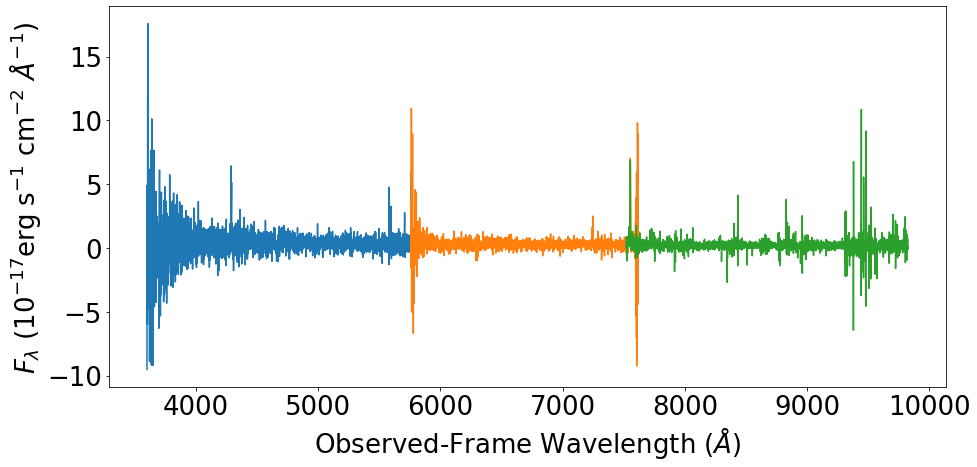

In [71]:
fig, ax = plt.subplots(figsize=(15,7))

for ch in channels:
    ax.plot(ch_waves[ch], ch_fluxes[ch], label=ch)

ax.set_ylabel(r'$F_\lambda$ ($10^{-17}$erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax.set_xlabel(r'Observed-Frame Wavelength ($\AA$)')

In [72]:
def ivar_weighted_coadd(ch_waves, ch_fluxes, ch_ivars, grid):
    padded_fluxes = {ch: np.zeros(len(grid)) for ch in channels}
    padded_ivars = {ch: np.zeros(len(grid)) for ch in channels}

    for ch in channels:
        ch_inds = np.searchsorted(grid, ch_waves[ch])
        padded_fluxes[ch][ch_inds] = ch_fluxes[ch]
        padded_ivars[ch][ch_inds] = ch_ivars[ch]

    num = sum(padded_fluxes[ch]*padded_ivars[ch] for ch in channels)
    combined_ivar = sum(padded_ivars[ch] for ch in channels)

    combined_spectrum = num
    valid_ivars = combined_ivar > 0
    combined_spectrum[valid_ivars] /= combined_ivar[valid_ivars]

    return combined_spectrum, combined_ivar


Text(0.5, 0, 'Observed-Frame Wavelength ($\\AA$)')

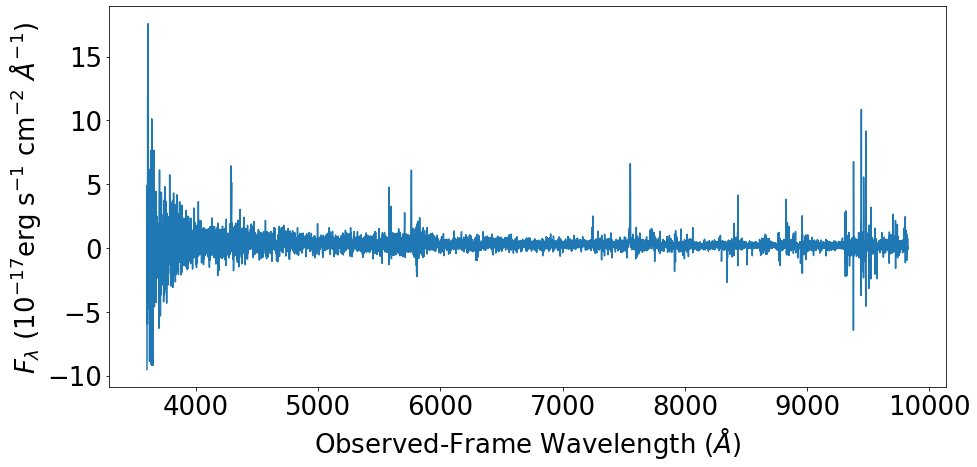

In [73]:
desi_wave_grid = np.arange(3600, 9824+.8, .8)

spectrum, ivar = ivar_weighted_coadd(
    ch_waves,
    ch_fluxes,
    ch_ivars,
    desi_wave_grid
)

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(desi_wave_grid, spectrum)

ax.set_ylabel(r'$F_\lambda$ ($10^{-17}$erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax.set_xlabel(r'Observed-Frame Wavelength ($\AA$)')

In [74]:
# lines = ["OII_DOUBLET", "HGAMMA", "HBETA", "OIII_4959", "OIII_5007", "NII_6548", "HALPHA", "NII_6584", "SII_6716", "SII_6731"]
#lines = [r'[OII] $\lambda3727 + \lambda3729$', r'$H\gamma$ $\lambda$4342', r'$H\beta$ $\lambda$4863', r'[OIII] $\lambda$4969', '[OIII] $\lambda$5007', \
#         '[NII] $\lambda$6548', r'$H\alpha$ $\lambda$6564', '[NII] $\lambda$6584', '[SII] $\lambda$6716', '[SII] $\lambda$6731']
#lines_waves = [3728.5, 4342, 4862.7, 4960.3, 5008.2, 6549.9, 6564.6, 6585.3, 6718.3, 6732.7] 

lines = [r'[OII] $\lambda3727 + \lambda3729$', r'$H\gamma$ $\lambda$4342', '[OIII] $\lambda$5007', \
         r'$H\alpha$ $\lambda$6564', '[SII] $\lambda$6716']
lines_waves = [3728.5, 4342, 5008.2, 6564.6, 6718.3] 

dic_lines = {}
for i, line in enumerate(lines):
    dic_lines[line] = lines_waves[i]
    

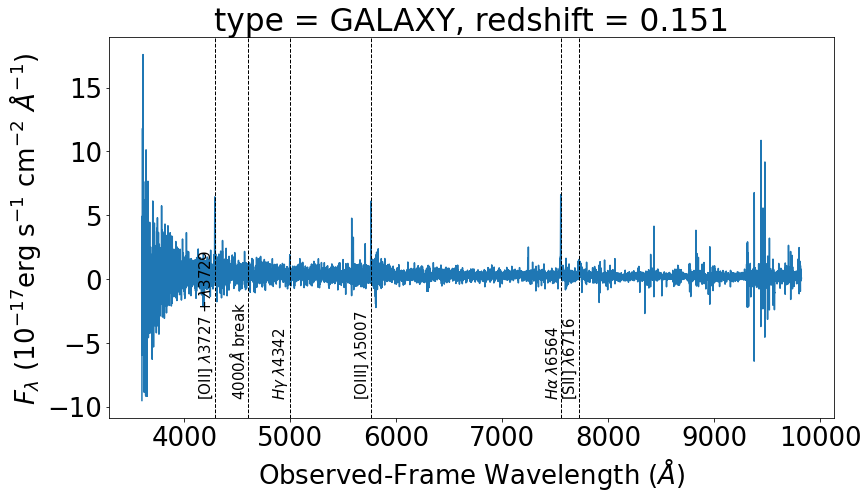

In [77]:
fig, ax = plt.subplots(figsize=(15,7))

ax.plot(desi_wave_grid, spectrum)
ax.set_ylabel(r'$F_\lambda$ ($10^{-17}$erg s$^{-1}$ cm$^{-2}$ $\AA^{-1}$)')
ax.set_xlabel(r'Observed-Frame Wavelength ($\AA$)')
ax.set_title(f'type = {spectype}, redshift = {redshift:.3f}')

w_start = desi_wave_grid[0]
w_cutoff = desi_wave_grid[-1]
for line, wave in dic_lines.items():
    obs_line_wave = wave * (1 + redshift)
    if obs_line_wave >= w_start and obs_line_wave <= w_cutoff:
        ax.axvline(x=obs_line_wave, ls='--', lw=1, c='k')
    
        ax.text(
            x=obs_line_wave,
            y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
            s=line,
            rotation=90,
            verticalalignment='bottom',
            horizontalalignment='right',
            fontsize=15
        )

if 4000*(1+redshift) <= w_cutoff:
    ax.axvline(x=4000*(1+redshift), ls='--', lw=1, c='k')
    ax.text(
        x=4000*(1+redshift),
        y=ax.get_ylim()[0] + 0.05 * (ax.get_ylim()[1] - ax.get_ylim()[0]),
        s=r"4000$\AA$ break",
        rotation=90,
        verticalalignment='bottom',
        horizontalalignment='right',
        fontsize=15
    )

#ax.set_xlim(desi_wave_grid[0], desi_wave_grid[-1])

plt.savefig('spectrum_png_example.png')

In [76]:
print(df_merged.loc[idx])


TARGETID           930599162347521
VDISP                        125.0
AV                        0.014368
AGE                      12.813417
LOGMSTAR                  8.446748
SFR                       0.020398
DN4000                    0.880362
OII_3726_EW              21.604519
OII_3729_EW              15.845334
HGAMMA_EW                11.616214
HBETA_EW                 44.229504
OIII_4959_EW             40.100628
OIII_5007_EW             44.471691
NII_6548_EW               0.963722
HALPHA_EW                49.195904
NII_6584_EW                5.25035
SII_6716_EW              11.708353
SII_6731_EW               9.130667
OII_3726_SIGMA           70.065475
OII_3729_SIGMA           70.065475
HGAMMA_SIGMA             59.130718
HBETA_SIGMA              59.130718
OIII_4959_SIGMA          70.065475
OIII_5007_SIGMA          70.065475
NII_6548_SIGMA           70.065475
HALPHA_SIGMA             59.130718
NII_6584_SIGMA           70.065475
SII_6716_SIGMA           70.065475
SII_6731_SIGMA      